In [300]:
import pandas as pd
project_data=pd.read_excel('case_study_data.xlsx')

In [301]:
project_data.head(5)

,checkin_acc,duration,credit_history,purpose,amount,svaing_acc,present_emp_since,inst_rate,personal_status,other_debtors,...,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
0,A11,9,A34,A43,1754,A65,A75,6,A93,A101,...,A121,101,A143,A152,3,A173,2,A192,A201,1
1,A12,72,A32,A43,8927,A61,A73,3,A92,A101,...,A121,33,A143,A152,2,A173,2,A191,A201,2
2,A14,18,A34,A46,3144,A61,A74,3,A93,A101,...,A121,74,A143,A152,2,A172,3,A191,A201,1
3,A11,63,A32,A42,11823,A61,A74,3,A93,A103,...,A122,68,A143,A153,2,A173,3,A191,A201,1
4,A11,36,A33,A40,7305,A61,A73,5,A93,A101,...,A124,80,A143,A153,3,A173,3,A191,A201,2


In [302]:
project_data.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checkin_acc          1000 non-null object
duration             1000 non-null int64
credit_history       1000 non-null object
purpose              1000 non-null object
amount               1000 non-null int64
svaing_acc           1000 non-null object
present_emp_since    1000 non-null object
inst_rate            1000 non-null int64
personal_status      1000 non-null object
other_debtors        1000 non-null object
residing_since       1000 non-null int64
property             1000 non-null object
age                  1000 non-null int64
inst_plans           1000 non-null object
housing              1000 non-null object
num_credits          1000 non-null int64
job                  1000 non-null object
dependents           1000 non-null int64
telephone            1000 non-null object
foreign_worker       1000 non-null object
status               1000 non-null int64
dtypes: int64(8), ob

Since there is no missing value inn above dataset, missing value processing not require

In [303]:
project_data.shape

(1000, 21)

Number of people thar are not default for loan  700 , ( 70.0 %)
Number of people thar are default for loan  300 , ( 30.0 %)


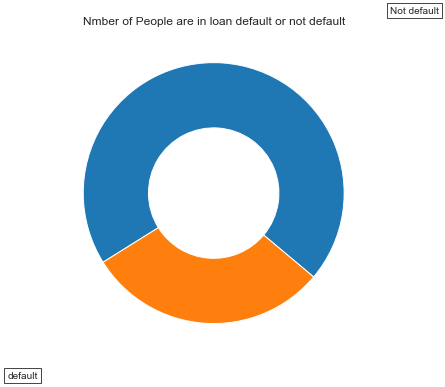

In [304]:
# PROVIDE CITATIONS TO YOUR CODE IF YOU TAKE IT FROM ANOTHER WEBSITE.
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py


y_value_counts = project_data['status'].value_counts()
print("Number of people thar are not default for loan ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[2]))*100,"%)")
print("Number of people thar are default for loan ", y_value_counts[2], ", (", (y_value_counts[2]/(y_value_counts[1]+y_value_counts[2]))*100,"%)")

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Not default", "default"]

data = [y_value_counts[1], y_value_counts[2]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Nmber of People are in loan default or not default")

plt.show()

In [305]:
print(project_data["status"].value_counts(normalize = True))
print("*"*50)

1    0.7
2    0.3
Name: status, dtype: float64
**************************************************


Dataset shows that 70% are class 1 group and 30% are in 2 group.

So it is imbalance dataset which should keep in mind during modeling. Model like logistic, svm need to be balance dataset

In [306]:
project_data['status'] = project_data['status'].map({1:"no_default", 2:"default"})
project_data['status'] = project_data['status'].astype('category')
print(project_data.head())

  checkin_acc  duration credit_history purpose  amount svaing_acc  \
0         A11         9            A34     A43    1754        A65   
1         A12        72            A32     A43    8927        A61   
2         A14        18            A34     A46    3144        A61   
3         A11        63            A32     A42   11823        A61   
4         A11        36            A33     A40    7305        A61   

  present_emp_since  inst_rate personal_status other_debtors  ...  property  \
0               A75          6             A93          A101  ...      A121   
1               A73          3             A92          A101  ...      A121   
2               A74          3             A93          A101  ...      A121   
3               A74          3             A93          A103  ...      A122   
4               A73          5             A93          A101  ...      A124   

   age  inst_plans housing num_credits   job dependents  telephone  \
0  101        A143    A152           3  

### High level statistics of numerical dataset

In [307]:
print(project_data.describe())

          duration        amount    inst_rate  residing_since          age  \
count  1000.000000   1000.000000  1000.000000     1000.000000  1000.000000   
mean     31.449000   4907.134000     4.606000        4.407000    53.566000   
std      18.055564   4234.100176     1.572016        1.570292    17.065664   
min       6.000000    375.000000     2.000000        2.000000    29.000000   
25%      18.000000   2048.250000     3.000000        3.000000    41.000000   
50%      27.000000   3479.500000     5.000000        5.000000    50.000000   
75%      36.000000   5958.500000     6.000000        6.000000    63.000000   
max     108.000000  27636.000000     6.000000        6.000000   113.000000   

       num_credits   dependents  
count  1000.000000  1000.000000  
mean      2.441000     2.155000  
std       0.697858     0.362086  
min       2.000000     2.000000  
25%       2.000000     2.000000  
50%       2.000000     2.000000  
75%       3.000000     2.000000  
max       6.000000     3.

variable like duration, amount, age seems like have some outlier which need to be cared during modeling.

In [308]:
import numpy as np
project_data_yes = project_data.loc[project_data["status"] == "no_default"];
project_data_no = project_data.loc[project_data["status"] == "default"];

In [309]:
#Mean 
print("Means value analysis of numerical dataset:")
print("*"*50)
print("duration",np.mean(project_data_yes["duration"]))
print("amount",np.mean(project_data_yes["amount"]))
print("inst_rate",np.mean(project_data_yes["inst_rate"]))
print("residing_since",np.mean(project_data_yes["residing_since"]))
print("age",np.mean(project_data_yes["age"]))
print("num_credits",np.mean(project_data_yes["num_credits"]))
print("dependents",np.mean(project_data_yes["dependents"]))
print("*"*50)
print("duration",np.mean(project_data_no["duration"]))
print("amount",np.mean(project_data_no["amount"]))
print("inst_rate",np.mean(project_data_no["inst_rate"]))
print("residing_since",np.mean(project_data_no["residing_since"]))
print("age",np.mean(project_data_no["age"]))
print("num_credits",np.mean(project_data_no["num_credits"]))
print("dependents",np.mean(project_data_no["dependents"]))

Means value analysis of numerical dataset:
**************************************************
duration 28.912857142857142
amount 4478.431428571429
inst_rate 4.532857142857143
residing_since 4.4071428571428575
age 54.58
num_credits 2.4614285714285713
dependents 2.1557142857142857
**************************************************
duration 37.36666666666667
amount 5907.44
inst_rate 4.776666666666666
residing_since 4.406666666666666
age 51.2
num_credits 2.3933333333333335
dependents 2.1533333333333333


Observation:

    the mean value of duration is higher in defaut case compare to non-default case . in general, bank should be caution regarding duration of loan amount so loan duration is the impotant variable in case of modelig.
    
    amount and installement rate in case of default case very high which again give a important inference regarding default.
    
    younger people are more vulnerable to be default.

In [310]:
#Variance, Std-deviation
print("\nStd-dev:");
print("*"*50)
print("duration",np.std(project_data_yes["duration"]))
print("amount",np.std(project_data_yes["amount"]))
print("inst_rate",np.std(project_data_yes["inst_rate"]))
print("residing_since",np.std(project_data_yes["residing_since"]))
print("age",np.std(project_data_yes["age"]))
print("num_credits",np.std(project_data_yes["num_credits"]))
print("dependents",np.std(project_data_yes["dependents"]))
print("*"*50)
print("duration",np.std(project_data_no["duration"]))
print("amount",np.std(project_data_no["amount"]))
print("inst_rate",np.std(project_data_no["inst_rate"]))
print("residing_since",np.std(project_data_no["residing_since"]))
print("age",np.std(project_data_no["age"]))
print("num_credits",np.std(project_data_no["num_credits"]))
print("dependents",np.std(project_data_no["dependents"]))


Std-dev:
**************************************************
duration 16.577079024351434
amount 3599.6343452611504
inst_rate 1.5848588426167187
residing_since 1.573424057686334
age 17.064270107031074
num_credits 0.711094298979264
dependents 0.36258426184650494
**************************************************
duration 19.858639317827283
amount 5294.867245399076
inst_rate 1.5253815551818133
residing_since 1.5603276009294398
age 16.804166150095035
num_credits 0.66228560472218
dependents 0.36030850978324513


Duration and amount have very high variance in default case which again need further processing to filter out exact defaulter.

### Univariate analysis(Histogram, PDF, CDF)

In [311]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### duration

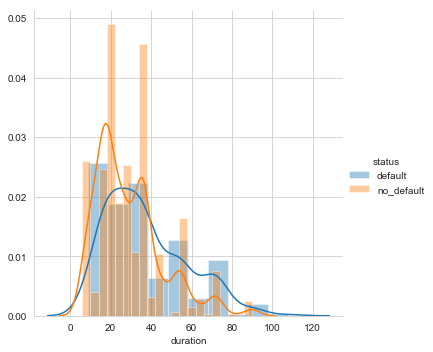

In [312]:
#PDF of duration
sns.FacetGrid(project_data, hue="status", size=5) \
   .map(sns.distplot, "duration") \
   .add_legend();
plt.show();

[0.171 0.262 0.337 0.057 0.086 0.017 0.054 0.002 0.013 0.001]
[  6.   16.2  26.4  36.6  46.8  57.   67.2  77.4  87.6  97.8 108. ]


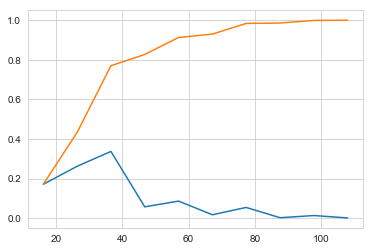

In [313]:

#------Plot CDF of duration

counts, bin_edges = np.histogram(project_data['duration'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show();

Observation:

    PDF of both class nearlly same which is ggod for modeling. most of time duration lie in range of 8-60 year.
    
    CDF shows that 90% of duration value is les than 60 year.

### Amount

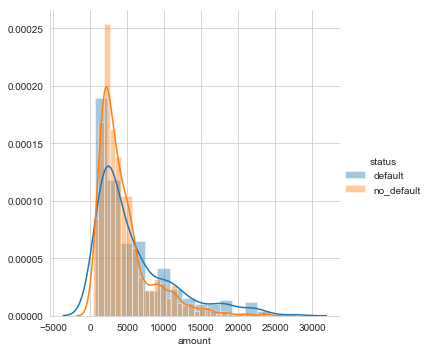

In [314]:
#PDF of amount
sns.FacetGrid(project_data, hue="status", size=5) \
   .map(sns.distplot, "amount") \
   .add_legend();
plt.show();

[0.445 0.293 0.097 0.08  0.038 0.019 0.014 0.008 0.005 0.001]
[  375.   3101.1  5827.2  8553.3 11279.4 14005.5 16731.6 19457.7 22183.8
 24909.9 27636. ]


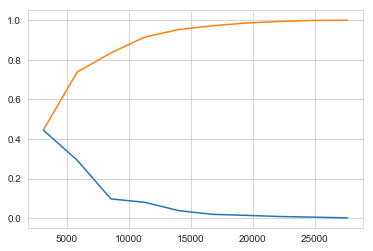

In [315]:

#------Plot CDF of amount

counts, bin_edges = np.histogram(project_data['amount'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show();

Observation:
    
    Distributon of credit amount is same for both class. around 90% of observation have credit amount less than 20000.

### Age

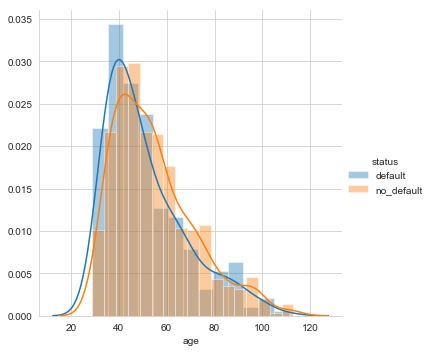

In [316]:
#PDF of age
sns.FacetGrid(project_data, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

[0.149 0.262 0.216 0.116 0.089 0.072 0.042 0.031 0.016 0.007]
[ 29.   37.4  45.8  54.2  62.6  71.   79.4  87.8  96.2 104.6 113. ]


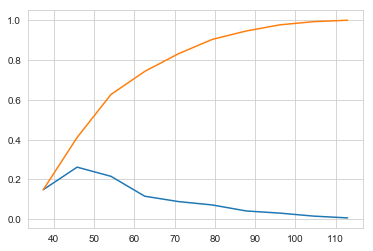

In [317]:

#------Plot CDF of age

counts, bin_edges = np.histogram(project_data['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show();

Observation:
    
    Age value have nearly almost same distribution in both class of status.
    
    Around 80% of people are less than 80 year age value

### Box plot of numerical variable

In [318]:
project_data.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checkin_acc          1000 non-null object
duration             1000 non-null int64
credit_history       1000 non-null object
purpose              1000 non-null object
amount               1000 non-null int64
svaing_acc           1000 non-null object
present_emp_since    1000 non-null object
inst_rate            1000 non-null int64
personal_status      1000 non-null object
other_debtors        1000 non-null object
residing_since       1000 non-null int64
property             1000 non-null object
age                  1000 non-null int64
inst_plans           1000 non-null object
housing              1000 non-null object
num_credits          1000 non-null int64
job                  1000 non-null object
dependents           1000 non-null int64
telephone            1000 non-null object
foreign_worker       1000 non-null object
status               1000 non-null category
dtypes: category(

In [319]:
#numerical data frame
numerial_data = project_data[['duration', 'amount','age','status']].copy()

In [320]:
numerial_data.head(5)

,duration,amount,age,status
0,9,1754,101,no_default
1,72,8927,33,default
2,18,3144,74,no_default
3,63,11823,68,no_default
4,36,7305,80,default


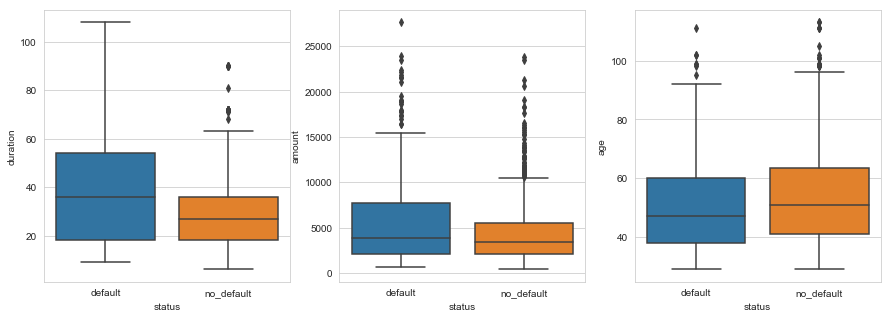

In [321]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ix, feature in enumerate(list(numerial_data.columns)[:-1]):
    sns.boxplot( x='status', y=feature, data=numerial_data, ax=axes[ix])
plt.show()

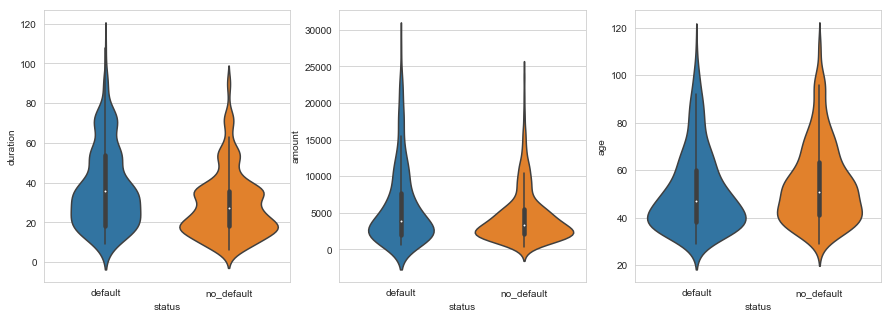

In [322]:
#Violin plot is the combination of box plot and probability density function.
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ix, feature in enumerate(list(numerial_data.columns)[:-1]):
    sns.violinplot( x='status', y=feature, data=numerial_data, ax=axes[ix])
plt.show()

Observaton:
    
    In duration of loan distribution, mean value of non-default is less than default i.e means Duration of loan should be minimum to protect from default. Variance of duration of providing loan is very high.
    
    Most of people having age less are more pronr todefault.

In [323]:
print(project_data["inst_rate"].value_counts())
print("*"*50)

6    476
3    231
5    157
2    136
Name: inst_rate, dtype: int64
**************************************************


In [324]:
print(project_data["residing_since"].value_counts())
print("*"*50)

6    413
3    308
5    149
2    130
Name: residing_since, dtype: int64
**************************************************


In [325]:
print(project_data["num_credits"].value_counts())
print("*"*50)

2    633
3    333
5     28
6      6
Name: num_credits, dtype: int64
**************************************************


In [326]:
print(project_data["dependents"].value_counts())
print("*"*50)

2    845
3    155
Name: dependents, dtype: int64
**************************************************


### Multivariate Analysis

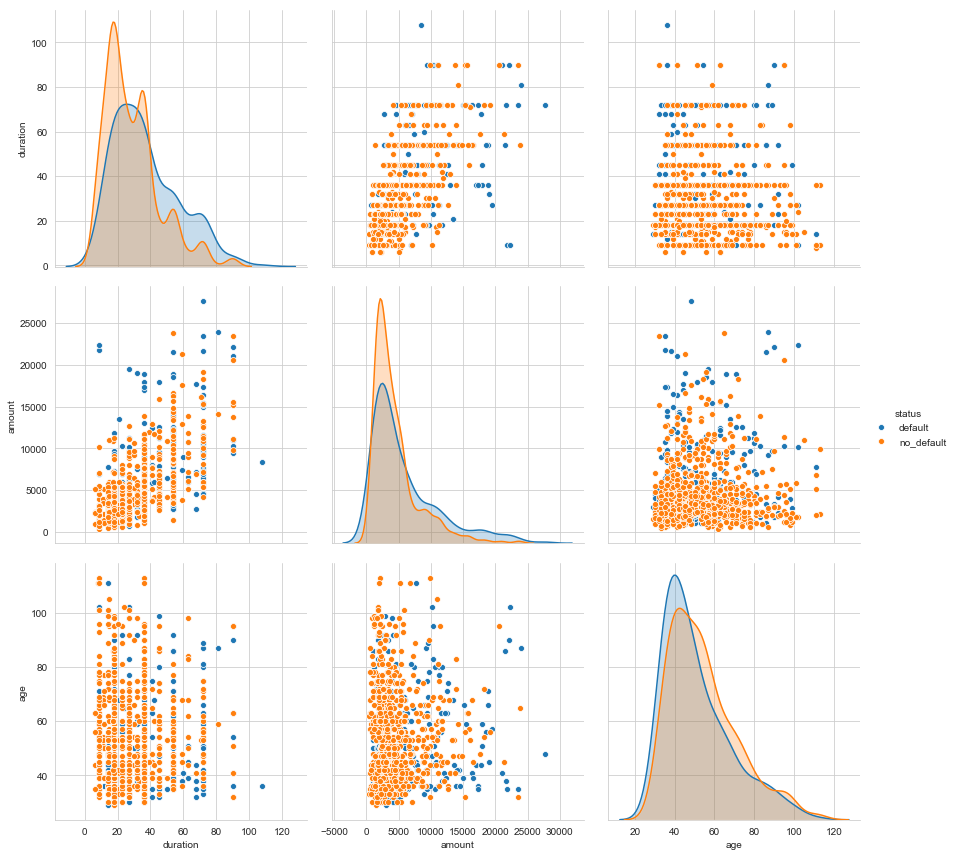

In [327]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(numerial_data, hue="status", size=4);
plt.show()

Amount and age are important variable for classification problem

it is good to have distribution are same for both class of people.

## Data split

In [328]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from collections import Counter
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [329]:
y_train=project_data['status']

x_train=project_data.drop(['status'], axis=1)
y_train.shape

(1000,)

In [330]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x_train,y_train,test_size=0.3,stratify=y_train,random_state=0)

## Data preprocessing(one hot encoding) for categorical data

In [331]:
x_train.columns

Index(['checkin_acc', 'duration', 'credit_history', 'purpose', 'amount',
       'svaing_acc', 'present_emp_since', 'inst_rate', 'personal_status',
       'other_debtors', 'residing_since', 'property', 'age', 'inst_plans',
       'housing', 'num_credits', 'job', 'dependents', 'telephone',
       'foreign_worker'],
      dtype='object')

In [332]:
x_train.info(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 766 to 394
Data columns (total 20 columns):
checkin_acc          700 non-null object
duration             700 non-null int64
credit_history       700 non-null object
purpose              700 non-null object
amount               700 non-null int64
svaing_acc           700 non-null object
present_emp_since    700 non-null object
inst_rate            700 non-null int64
personal_status      700 non-null object
other_debtors        700 non-null object
residing_since       700 non-null int64
property             700 non-null object
age                  700 non-null int64
inst_plans           700 non-null object
housing              700 non-null object
num_credits          700 non-null int64
job                  700 non-null object
dependents           700 non-null int64
telephone            700 non-null object
foreign_worker       700 non-null object
dtypes: int64(7), object(13)
memory usage: 114.8+ KB


In [333]:
#you can vectorize the checkin_acc
#______________________________
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(x_train['checkin_acc'].values)# fit has to apply only on train data


# we use fitted CountVectorizer to convert the text to vector
x_train_checkin_acc = vectorizer.transform(x_train['checkin_acc'].values)
x_test_checkin_acc = vectorizer.transform(x_test['checkin_acc'].values)

print("Shape of matrix after one hot encodig ",x_train_checkin_acc.shape, y_train.shape)
print("Shape of matrix after one hot encodig ",x_test_checkin_acc.shape)

Shape of matrix after one hot encodig  (700, 4) (700,)
Shape of matrix after one hot encodig  (300, 4)


In [334]:
print(x_train["foreign_worker"].value_counts())
print("*"*50)

A201    676
A202     24
Name: foreign_worker, dtype: int64
**************************************************


In [335]:
#you can vectorize the credit_history
#______________________________
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(x_train['credit_history'].values)# fit has to apply only on train data


# we use fitted CountVectorizer to convert the text to vector
x_train_credit_history = vectorizer.transform(x_train['credit_history'].values)
x_test_credit_history = vectorizer.transform(x_test['credit_history'].values)

print("Shape of matrix after one hot encodig ",x_train_credit_history.shape, y_train.shape)
print("Shape of matrix after one hot encodig ",x_test_credit_history.shape)

Shape of matrix after one hot encodig  (700, 5) (700,)
Shape of matrix after one hot encodig  (300, 5)


In [336]:
#you can vectorize the purpose
#______________________________
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(x_train['purpose'].values)# fit has to apply only on train data


# we use fitted CountVectorizer to convert the text to vector
x_train_purpose = vectorizer.transform(x_train['purpose'].values)
x_test_purpose = vectorizer.transform(x_test['purpose'].values)

print("Shape of matrix after one hot encodig ",x_train_purpose.shape, y_train.shape)
print("Shape of matrix after one hot encodig ",x_test_purpose.shape)

Shape of matrix after one hot encodig  (700, 10) (700,)
Shape of matrix after one hot encodig  (300, 10)


In [337]:
#you can vectorize the svaing_acc
#______________________________
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(x_train['svaing_acc'].values)# fit has to apply only on train data


# we use fitted CountVectorizer to convert the text to vector
x_train_svaing_acc = vectorizer.transform(x_train['svaing_acc'].values)
x_test_svaing_acc = vectorizer.transform(x_test['svaing_acc'].values)

print("Shape of matrix after one hot encodig ",x_train_svaing_acc.shape, y_train.shape)
print("Shape of matrix after one hot encodig ",x_test_svaing_acc.shape)

Shape of matrix after one hot encodig  (700, 5) (700,)
Shape of matrix after one hot encodig  (300, 5)


In [338]:
#you can vectorize the present_emp_since
#______________________________
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(x_train['present_emp_since'].values)# fit has to apply only on train data


# we use fitted CountVectorizer to convert the text to vector
x_train_present_emp_since = vectorizer.transform(x_train['present_emp_since'].values)
x_test_present_emp_since = vectorizer.transform(x_test['present_emp_since'].values)

print("Shape of matrix after one hot encodig ",x_train_present_emp_since.shape, y_train.shape)
print("Shape of matrix after one hot encodig ",x_test_present_emp_since.shape)

Shape of matrix after one hot encodig  (700, 5) (700,)
Shape of matrix after one hot encodig  (300, 5)


In [339]:
#you can vectorize the present_emp_since
#______________________________
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(x_train['personal_status'].values)# fit has to apply only on train data


# we use fitted CountVectorizer to convert the text to vector
x_train_personal_status = vectorizer.transform(x_train['personal_status'].values)
x_test_personal_status = vectorizer.transform(x_test['personal_status'].values)

print("Shape of matrix after one hot encodig ",x_train_personal_status.shape, y_train.shape)
print("Shape of matrix after one hot encodig ",x_test_personal_status.shape)

Shape of matrix after one hot encodig  (700, 4) (700,)
Shape of matrix after one hot encodig  (300, 4)


In [340]:
#you can vectorize the present_emp_since
#______________________________
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(x_train['other_debtors'].values)# fit has to apply only on train data


# we use fitted CountVectorizer to convert the text to vector
x_train_other_debtors = vectorizer.transform(x_train['other_debtors'].values)
x_test_other_debtors = vectorizer.transform(x_test['other_debtors'].values)

print("Shape of matrix after one hot encodig ",x_train_other_debtors.shape, y_train.shape)
print("Shape of matrix after one hot encodig ",x_test_other_debtors.shape)

Shape of matrix after one hot encodig  (700, 3) (700,)
Shape of matrix after one hot encodig  (300, 3)


In [341]:
#you can vectorize the property
#______________________________
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(x_train['property'].values)# fit has to apply only on train data


# we use fitted CountVectorizer to convert the text to vector
x_train_property = vectorizer.transform(x_train['property'].values)
x_test_property = vectorizer.transform(x_test['property'].values)

print("Shape of matrix after one hot encodig ",x_train_property.shape, y_train.shape)
print("Shape of matrix after one hot encodig ",x_test_property.shape)

Shape of matrix after one hot encodig  (700, 4) (700,)
Shape of matrix after one hot encodig  (300, 4)


In [342]:
#you can vectorize the inst_plans
#______________________________
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(x_train['inst_plans'].values)# fit has to apply only on train data


# we use fitted CountVectorizer to convert the text to vector
x_train_inst_plans = vectorizer.transform(x_train['inst_plans'].values)
x_test_inst_plans = vectorizer.transform(x_test['inst_plans'].values)

print("Shape of matrix after one hot encodig ",x_train_inst_plans.shape, y_train.shape)
print("Shape of matrix after one hot encodig ",x_test_inst_plans.shape)

Shape of matrix after one hot encodig  (700, 3) (700,)
Shape of matrix after one hot encodig  (300, 3)


In [343]:
#you can vectorize the housing
#______________________________
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(x_train['housing'].values)# fit has to apply only on train data


# we use fitted CountVectorizer to convert the text to vector
x_train_housing = vectorizer.transform(x_train['housing'].values)
x_test_housing = vectorizer.transform(x_test['housing'].values)

print("Shape of matrix after one hot encodig ",x_train_housing.shape, y_train.shape)
print("Shape of matrix after one hot encodig ",x_test_housing.shape)

Shape of matrix after one hot encodig  (700, 3) (700,)
Shape of matrix after one hot encodig  (300, 3)


In [344]:
#you can vectorize the telephone
#______________________________
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(x_train['telephone'].values)# fit has to apply only on train data


# we use fitted CountVectorizer to convert the text to vector
x_train_telephone = vectorizer.transform(x_train['telephone'].values)
x_test_telephone = vectorizer.transform(x_test['telephone'].values)

print("Shape of matrix after one hot encodig ",x_train_telephone.shape, y_train.shape)
print("Shape of matrix after one hot encodig ",x_test_telephone.shape)

Shape of matrix after one hot encodig  (700, 2) (700,)
Shape of matrix after one hot encodig  (300, 2)


In [345]:
#you can vectorize the foreign_worker
#______________________________
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(x_train['foreign_worker'].values)# fit has to apply only on train data


# we use fitted CountVectorizer to convert the text to vector
x_train_foreign_worker = vectorizer.transform(x_train['foreign_worker'].values)
x_test_foreign_worker = vectorizer.transform(x_test['foreign_worker'].values)

print("Shape of matrix after one hot encodig ",x_train_foreign_worker.shape, y_train.shape)
print("Shape of matrix after one hot encodig ",x_test_foreign_worker.shape)

Shape of matrix after one hot encodig  (700, 2) (700,)
Shape of matrix after one hot encodig  (300, 2)


In [346]:

# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train_catgorical = hstack((x_train_checkin_acc,x_train_credit_history,x_train_purpose,x_train_svaing_acc,x_train_present_emp_since,x_train_personal_status,x_train_other_debtors,x_train_property,x_train_inst_plans,x_train_housing,x_train_telephone,x_train_foreign_worker))
x_test_catgorical = hstack((x_test_checkin_acc,x_test_credit_history,x_test_purpose,x_test_svaing_acc,x_test_present_emp_since,x_test_personal_status,x_test_other_debtors,x_test_property,x_test_inst_plans,x_test_housing,x_test_telephone,x_test_foreign_worker))

### Data preprocessing for Numerical data

In [347]:
x_train.head(10)

,checkin_acc,duration,credit_history,purpose,amount,svaing_acc,present_emp_since,inst_rate,personal_status,other_debtors,residing_since,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker
766,A11,45,A32,A42,4662,A61,A72,3,A91,A101,6,A122,47,A143,A152,2,A172,2,A191,A201
338,A11,36,A32,A42,6254,A61,A73,6,A93,A101,6,A122,42,A143,A152,2,A173,2,A191,A201
798,A14,36,A33,A40,1076,A65,A75,6,A94,A101,6,A123,81,A143,A152,3,A173,2,A192,A201
468,A14,50,A33,A49,4146,A61,A73,3,A92,A101,3,A123,39,A143,A152,3,A173,2,A192,A201
883,A14,27,A34,A43,1647,A61,A71,6,A92,A101,6,A123,98,A143,A152,3,A171,2,A191,A201
255,A12,90,A33,A43,11127,A65,A73,2,A93,A101,2,A121,41,A143,A152,2,A172,2,A191,A201
514,A14,36,A32,A40,3383,A65,A72,6,A93,A101,2,A122,81,A143,A152,2,A173,2,A191,A201
961,A12,32,A33,A40,3530,A61,A73,2,A91,A101,6,A122,71,A143,A152,3,A173,2,A191,A201
111,A13,23,A32,A46,588,A61,A72,6,A92,A101,6,A122,35,A143,A151,2,A173,2,A192,A201
730,A12,36,A33,A43,9605,A61,A72,2,A93,A101,3,A123,50,A143,A152,2,A173,2,A191,A201


In [348]:
print(x_train["residing_since"].value_counts())
print("*"*50)

6    285
3    218
5    108
2     89
Name: residing_since, dtype: int64
**************************************************


In [349]:
#inst_rate
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer.fit(x_train['inst_rate'].values.reshape(-1,1))

x_train_inst_rate_norm = normalizer.transform(x_train['inst_rate'].values.reshape(-1,1))
x_test_inst_rate_norm = normalizer.transform(x_test['inst_rate'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_inst_rate_norm.shape, y_train.shape)
print(x_test_inst_rate_norm.shape, y_test.shape)

After vectorizations
(700, 1) (700,)
(300, 1) (300,)


In [350]:
#residing_since
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer.fit(x_train['residing_since'].values.reshape(-1,1))

x_train_residing_since_norm = normalizer.transform(x_train['residing_since'].values.reshape(-1,1))
x_test_residing_since_norm = normalizer.transform(x_test['residing_since'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_residing_since_norm.shape, y_train.shape)
print(x_test_residing_since_norm.shape, y_test.shape)

After vectorizations
(700, 1) (700,)
(300, 1) (300,)


In [351]:
#num_credits
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer.fit(x_train['num_credits'].values.reshape(-1,1))

x_train_num_credits_norm = normalizer.transform(x_train['num_credits'].values.reshape(-1,1))
x_test_num_credits_norm = normalizer.transform(x_test['num_credits'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_num_credits_norm.shape, y_train.shape)
print(x_test_num_credits_norm.shape, y_test.shape)

After vectorizations
(700, 1) (700,)
(300, 1) (300,)


In [352]:
#dependents
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer.fit(x_train['dependents'].values.reshape(-1,1))

x_train_dependents_norm = normalizer.transform(x_train['dependents'].values.reshape(-1,1))
x_test_dependents_norm = normalizer.transform(x_test['dependents'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_dependents_norm.shape, y_train.shape)
print(x_test_dependents_norm.shape, y_test.shape)

After vectorizations
(700, 1) (700,)
(300, 1) (300,)


In [353]:
#duration
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer.fit(x_train['duration'].values.reshape(-1,1))

x_train_duration_norm = normalizer.transform(x_train['duration'].values.reshape(-1,1))
x_test_duration_norm = normalizer.transform(x_test['duration'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_duration_norm.shape, y_train.shape)
print(x_test_duration_norm.shape, y_test.shape)

After vectorizations
(700, 1) (700,)
(300, 1) (300,)


In [354]:
#amount
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer.fit(x_train['amount'].values.reshape(-1,1))

x_train_amount_norm = normalizer.transform(x_train['amount'].values.reshape(-1,1))
x_test_amount_norm = normalizer.transform(x_test['amount'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_amount_norm.shape, y_train.shape)
print(x_test_amount_norm.shape, y_test.shape)

After vectorizations
(700, 1) (700,)
(300, 1) (300,)


In [355]:
#age
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer.fit(x_train['age'].values.reshape(-1,1))

x_train_age_norm = normalizer.transform(x_train['age'].values.reshape(-1,1))
x_test_age_norm = normalizer.transform(x_test['age'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_age_norm.shape, y_train.shape)
print(x_test_age_norm.shape, y_test.shape)

After vectorizations
(700, 1) (700,)
(300, 1) (300,)


In [356]:

# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train_numerical = np.hstack((x_train_inst_rate_norm,x_train_residing_since_norm,x_train_num_credits_norm,x_train_dependents_norm,x_train_duration_norm,x_train_amount_norm,x_train_age_norm))
x_test_numerical = np.hstack((x_test_inst_rate_norm,x_test_residing_since_norm,x_test_num_credits_norm,x_test_dependents_norm,x_test_duration_norm,x_test_amount_norm,x_test_age_norm))
print(x_train_numerical.shape)
print(x_test_numerical.shape)

(700, 7)
(300, 7)


### Merge categorical and numerical

In [357]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train_bow = hstack((x_train_catgorical,x_train_numerical)).tocsr()
x_test_bow = hstack((x_test_catgorical,x_test_numerical)).tocsr()
print(x_train_bow.shape)
print(x_test_bow.shape)

(700, 57)
(300, 57)


In [359]:
type(x_train_bow)

scipy.sparse.csr.csr_matrix

In [361]:
#export dataset
from scipy import sparse
sparse.save_npz("x_train_bow.npz", x_train_bow)
sparse.save_npz("x_test_bow.npz", x_test_bow)

### Apply models

In [358]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
#from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

In [138]:
#!pip install mlxtend

In [139]:
def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)

In [140]:
def report_log_loss(train_x, train_y, test_x, test_y,  clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)

In [142]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
 
    A =(((C.T)/(C.sum(axis=1))).T)

    B =(C/C.sum(axis=0))

    labels = [1,2]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

### Apply KNN Model

for alpha = 5
Log Loss : 0.5677450892293727
for alpha = 11
Log Loss : 0.5521286924131465
for alpha = 15
Log Loss : 0.5487053539820466
for alpha = 21
Log Loss : 0.5433485566269952
for alpha = 31
Log Loss : 0.5273931494209141
for alpha = 41
Log Loss : 0.5234265124768568
for alpha = 51
Log Loss : 0.5254634661655676
for alpha = 99
Log Loss : 0.5143686928660826
for alpha = 111
Log Loss : 0.5138126084138344
for alpha = 121
Log Loss : 0.5130709010573696
for alpha = 125
Log Loss : 0.5119264135421986
for alpha = 131
Log Loss : 0.5103164863698773
for alpha = 135
Log Loss : 0.5113921242536279
for alpha = 141
Log Loss : 0.5110420867954001
for alpha = 145
Log Loss : 0.5115638617268088
for alpha = 151
Log Loss : 0.5115789017984963
for alpha = 161
Log Loss : 0.5113905236137384


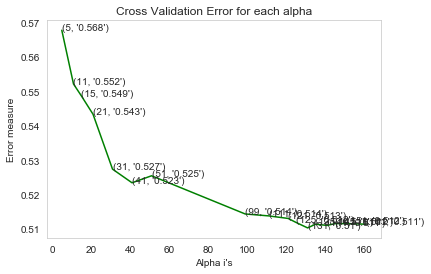

CalibratedClassifierCV(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                           leaf_size=30,
                                                           metric='minkowski',
                                                           metric_params=None,
                                                           n_jobs=None,
                                                           n_neighbors=131, p=2,
                                                           weights='uniform'),
                       cv='warn', method='sigmoid')

In [226]:
alpha = [5, 11, 15, 21, 31, 41, 51, 99,111,121,125,131,135,141,145,151,161]
test_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(x_train_bow, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(x_train_bow, y_train)
    sig_clf_probs = sig_clf.predict_proba(x_test_bow)
    test_log_error_array.append(log_loss(y_test, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_test, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, test_log_error_array,c='g')
for i, txt in enumerate(np.round(test_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],test_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(test_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(x_train_bow, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_train_bow, y_train)

In [227]:
predict_y = sig_clf.predict_proba(x_train_bow)
train_loss_knn=log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",train_loss_knn)
predict_y = sig_clf.predict_proba(x_test_bow)
test_loss_knn=log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",test_loss_knn)

For values of best alpha =  131 The train log loss is: 0.5254030678246904
For values of best alpha =  131 The test log loss is: 0.5103164863698773


Log loss : 0.5103164863698773
Number of mis-classified points : 0.2866666666666667
-------------------- Confusion matrix --------------------


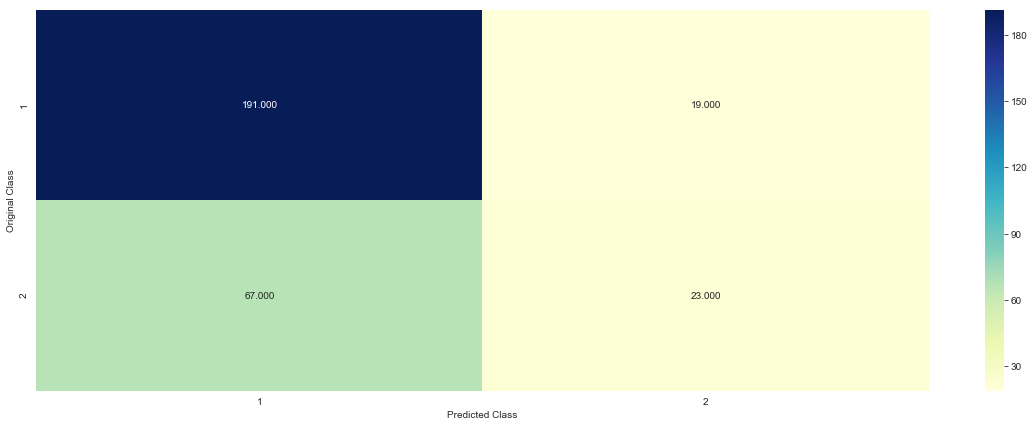

-------------------- Precision matrix (Columm Sum=1) --------------------


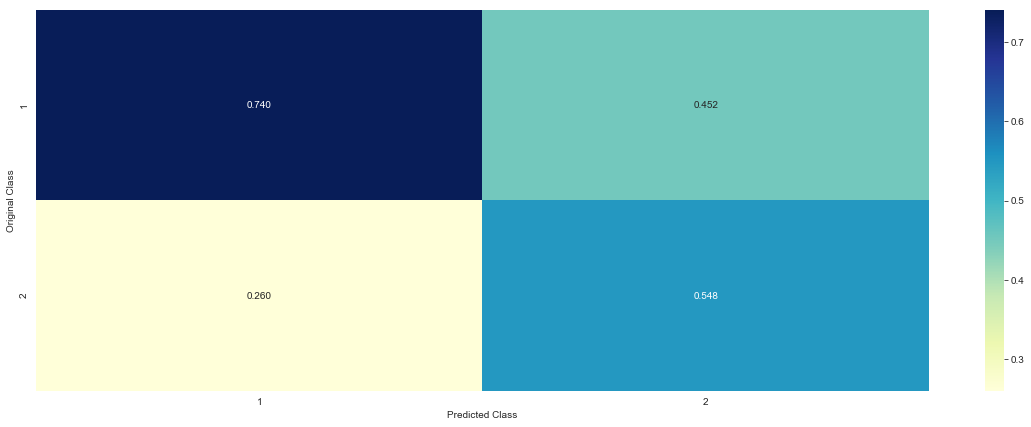

-------------------- Recall matrix (Row sum=1) --------------------


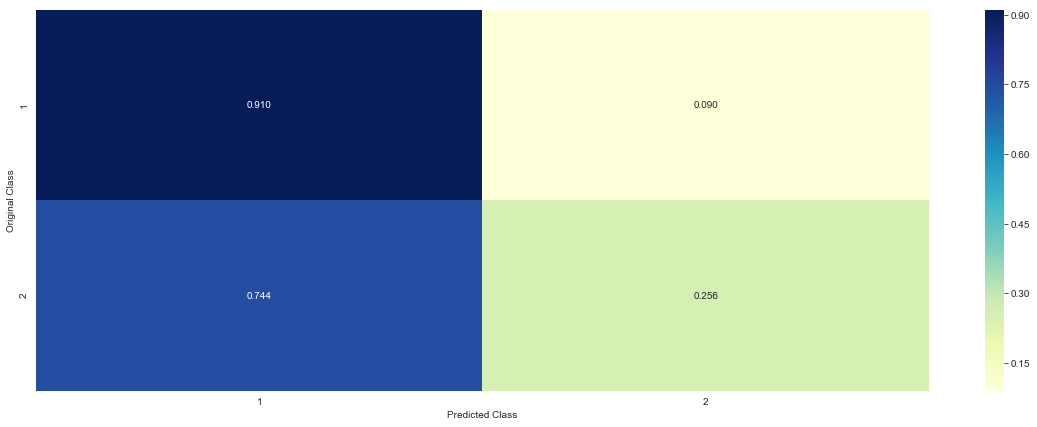

In [228]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
predict_and_plot_confusion_matrix(x_train_bow, y_train, x_test_bow, y_test, clf)

### Naive base

for alpha = 1e-05
Log Loss : 0.5244343687940877
for alpha = 0.0001
Log Loss : 0.5244346349078668
for alpha = 0.001
Log Loss : 0.5244372998728016
for alpha = 0.1
Log Loss : 0.5247614456542758
for alpha = 1
Log Loss : 0.5277318843937572
for alpha = 10
Log Loss : 0.5472951409480435
for alpha = 100
Log Loss : 0.58585516647005
for alpha = 1000
Log Loss : 0.5822895215686275


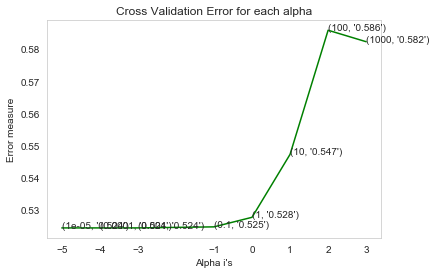

CalibratedClassifierCV(base_estimator=MultinomialNB(alpha=1e-05,
                                                    class_prior=None,
                                                    fit_prior=True),
                       cv='warn', method='sigmoid')

In [230]:
from sklearn.calibration import CalibratedClassifierCV
alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
test_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(x_train_bow, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(x_train_bow, y_train)
    sig_clf_probs = sig_clf.predict_proba(x_test_bow)
    test_log_error_array.append(log_loss(y_test, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_test, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), test_log_error_array,c='g')
for i, txt in enumerate(np.round(test_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),test_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(test_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(x_train_bow, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_train_bow, y_train)


In [231]:

predict_y = sig_clf.predict_proba(x_train_bow)
train_loss_nb=log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",train_loss_nb)

predict_y = sig_clf.predict_proba(x_test_bow)
test_loss_nb=log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",test_loss_nb)

For values of best alpha =  1e-05 The train log loss is: 0.49438402384962726
For values of best alpha =  1e-05 The test log loss is: 0.5244343687940877


Log Loss : 0.5244343687940877
Number of missclassified point : 0.2866666666666667
-------------------- Confusion matrix --------------------


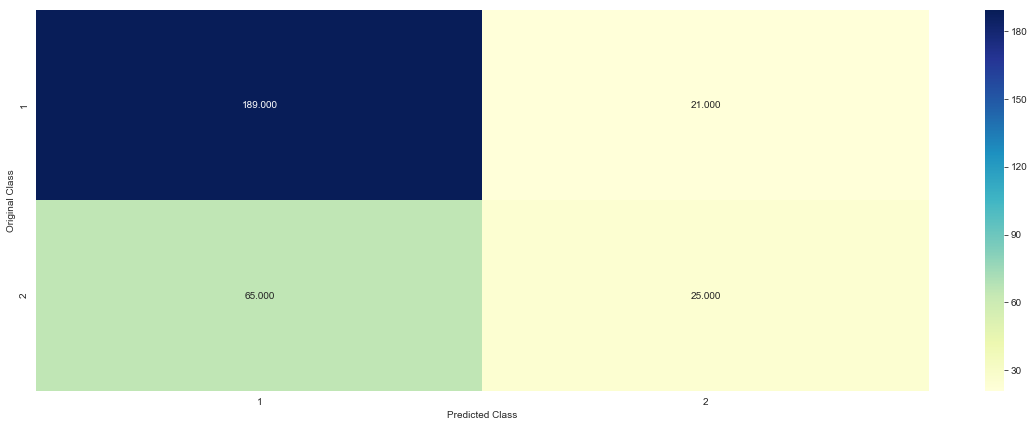

-------------------- Precision matrix (Columm Sum=1) --------------------


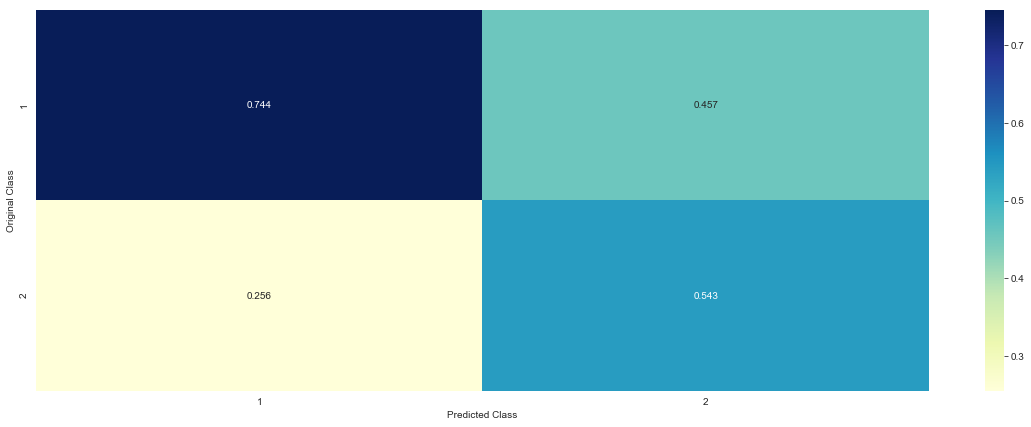

-------------------- Recall matrix (Row sum=1) --------------------


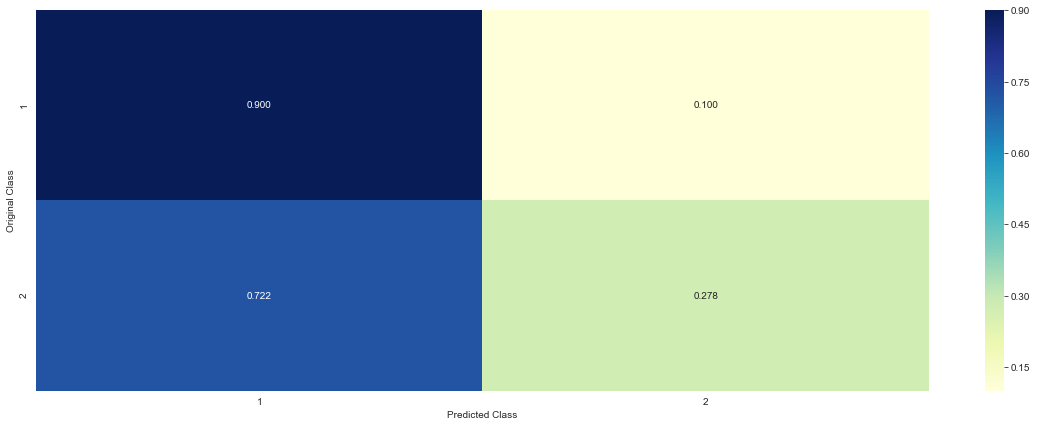

In [232]:
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(x_train_bow, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_train_bow, y_train)
sig_clf_probs = sig_clf.predict_proba(x_test_bow)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(y_test, sig_clf_probs))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(x_test_bow)- y_test))/y_test.shape[0])
plot_confusion_matrix(y_test, sig_clf.predict(x_test_bow.toarray()))

### Logistic Regression

for alpha = 1e-06
Log Loss : 0.5236440086590626
for alpha = 1e-05
Log Loss : 0.5279449654681101
for alpha = 0.0001
Log Loss : 0.548121243619925
for alpha = 0.001
Log Loss : 0.5238197366283441
for alpha = 0.01
Log Loss : 0.514763796862632
for alpha = 0.1
Log Loss : 0.507216640738673
for alpha = 1
Log Loss : 0.5085025171464272
for alpha = 10
Log Loss : 0.5094075940017829
for alpha = 100
Log Loss : 0.5097394158551788


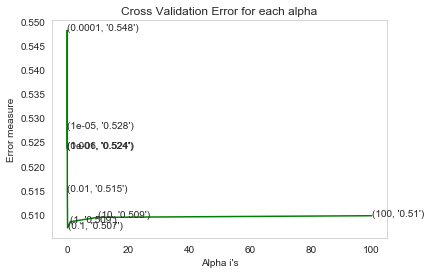

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.1, average=False,
                                                    class_weight='balanced',
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='log', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=42,
                                                    shuffle=True, tol=0.001,
                                       

In [233]:
alpha = [10 ** x for x in range(-6, 3)]
test_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(x_train_bow, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(x_train_bow, y_train)
    sig_clf_probs = sig_clf.predict_proba(x_test_bow)
    test_log_error_array.append(log_loss(y_test, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_test, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, test_log_error_array,c='g')
for i, txt in enumerate(np.round(test_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],test_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(test_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(x_train_bow, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_train_bow, y_train)

In [234]:
predict_y = sig_clf.predict_proba(x_train_bow)
train_loss_logistic=log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",train_loss_logistic)

predict_y = sig_clf.predict_proba(x_test_bow)
test_loss_logistic=log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",test_loss_logistic)

For values of best alpha =  0.1 The train log loss is: 0.49388984368629035
For values of best alpha =  0.1 The test log loss is: 0.507216640738673


Log loss : 0.507216640738673
Number of mis-classified points : 0.2833333333333333
-------------------- Confusion matrix --------------------


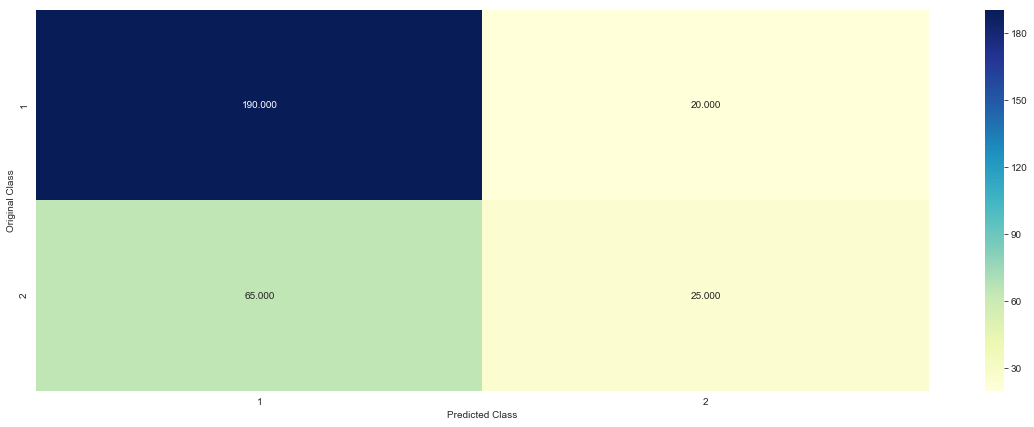

-------------------- Precision matrix (Columm Sum=1) --------------------


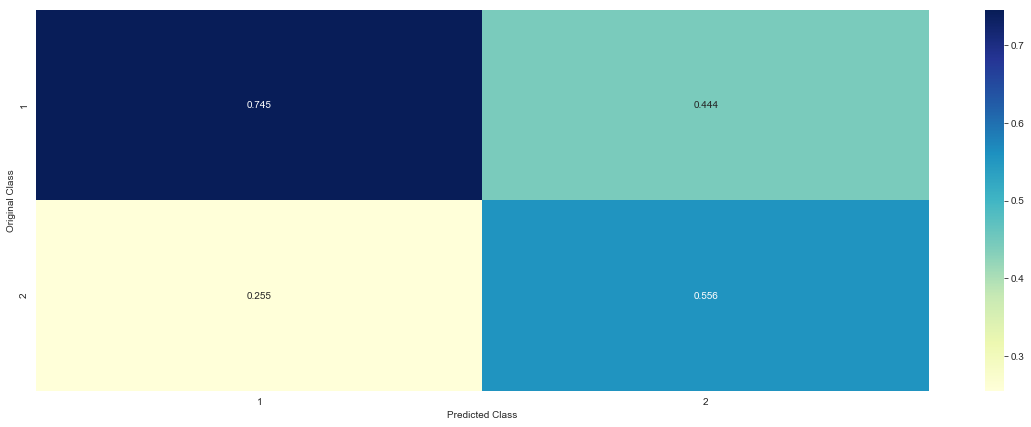

-------------------- Recall matrix (Row sum=1) --------------------


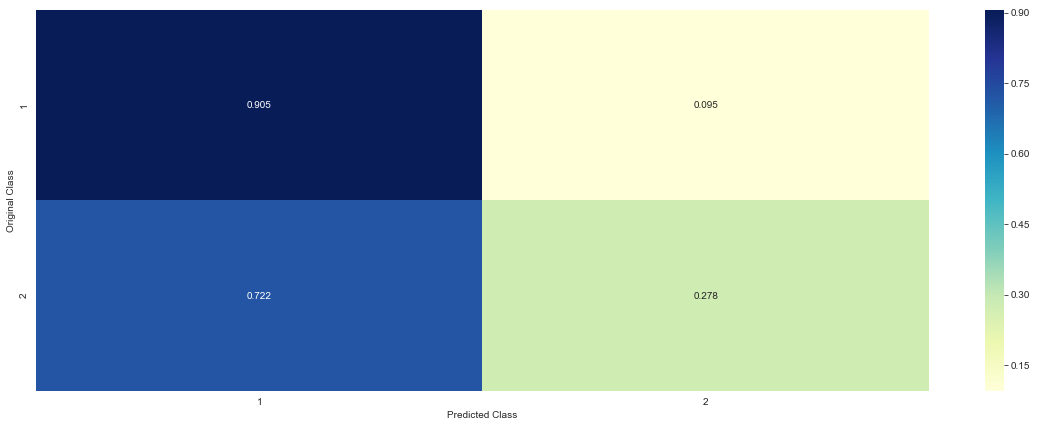

In [235]:
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(x_train_bow, y_train, x_test_bow, y_test, clf)

### Linear Support Vector Machines

for C = 1e-05
Log Loss : 0.5345223097351688
for C = 0.0001
Log Loss : 0.5316467611308613
for C = 0.001
Log Loss : 0.5285901077194648
for C = 0.01
Log Loss : 0.517399979784258
for C = 0.1
Log Loss : 0.5021887125930012
for C = 1
Log Loss : 0.5095449568376659
for C = 10
Log Loss : 0.5097979113724058
for C = 100
Log Loss : 0.509771062890314


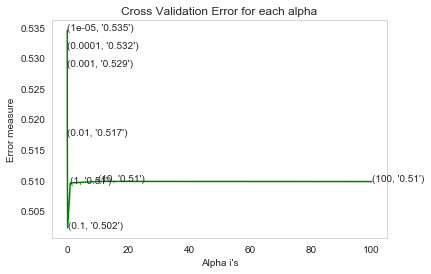

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.1, average=False,
                                                    class_weight='balanced',
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='hinge', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=42,
                                                    shuffle=True, tol=0.001,
                                     

In [236]:
alpha = [10 ** x for x in range(-5, 3)]
test_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(x_train_bow, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(x_train_bow, y_train)
    sig_clf_probs = sig_clf.predict_proba(x_test_bow)
    test_log_error_array.append(log_loss(y_test, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(y_test, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, test_log_error_array,c='g')
for i, txt in enumerate(np.round(test_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],test_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(test_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(x_train_bow, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_train_bow, y_train)

In [237]:
predict_y = sig_clf.predict_proba(x_train_bow)
train_loss_svm=log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",train_loss_svm)

predict_y = sig_clf.predict_proba(x_test_bow)
test_loss_svm=log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",test_loss_svm)

For values of best alpha =  0.1 The train log loss is: 0.49291072491084476
For values of best alpha =  0.1 The test log loss is: 0.5021887125930012


Log loss : 0.5021887125930012
Number of mis-classified points : 0.27666666666666667
-------------------- Confusion matrix --------------------


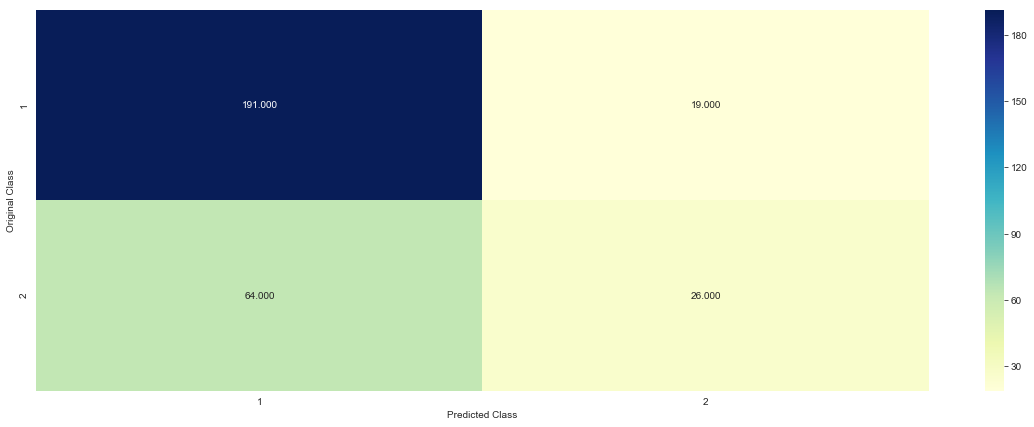

-------------------- Precision matrix (Columm Sum=1) --------------------


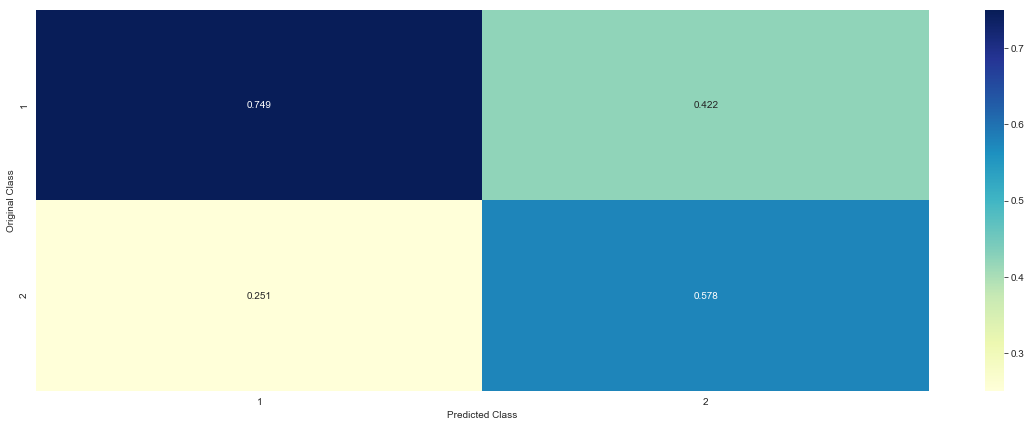

-------------------- Recall matrix (Row sum=1) --------------------


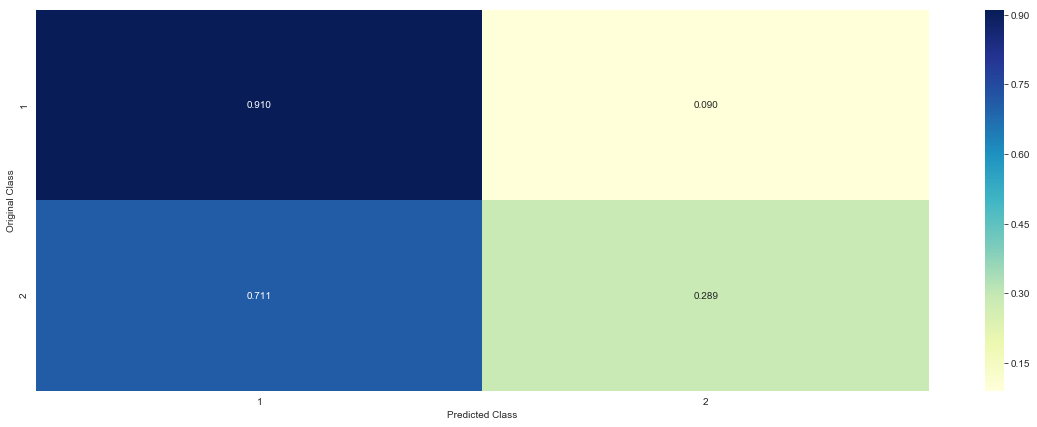

In [238]:
# clf = SVC(C=alpha[best_alpha],kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(x_train_bow, y_train,x_test_bow,y_test, clf)

### Decision tree

In [239]:
from sklearn.tree import DecisionTreeClassifier
alpha = [5, 10, 100, 500]
max_depth = [1, 5, 10, 50, 100, 500, 100]
test_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for min_samples_split =", i,"and max depth = ", j)
        clf = DecisionTreeClassifier(min_samples_split=i,  max_depth=j, random_state=42, class_weight='balanced')
        clf.fit(x_train_bow, y_train)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(x_train_bow, y_train)
        sig_clf_probs = sig_clf.predict_proba(x_test_bow)
        test_log_error_array.append(log_loss(y_test, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(y_test, sig_clf_probs)) 

'''fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, test_log_error_array,c='g')
for i, txt in enumerate(np.round(test_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],test_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''



for min_samples_split = 5 and max depth =  1
Log Loss : 0.5305342124853581
for min_samples_split = 5 and max depth =  5
Log Loss : 0.5498871584475225
for min_samples_split = 5 and max depth =  10
Log Loss : 0.5613197594310974
for min_samples_split = 5 and max depth =  50
Log Loss : 0.578204992006754
for min_samples_split = 5 and max depth =  100
Log Loss : 0.578204992006754
for min_samples_split = 5 and max depth =  500
Log Loss : 0.578204992006754
for min_samples_split = 5 and max depth =  100
Log Loss : 0.578204992006754
for min_samples_split = 10 and max depth =  1
Log Loss : 0.5305342124853581
for min_samples_split = 10 and max depth =  5
Log Loss : 0.5475993041572594
for min_samples_split = 10 and max depth =  10
Log Loss : 0.5559200932708738
for min_samples_split = 10 and max depth =  50
Log Loss : 0.5696337158282819
for min_samples_split = 10 and max depth =  100
Log Loss : 0.5696337158282819
for min_samples_split = 10 and max depth =  500
Log Loss : 0.5696337158282819
for min_s

'fig, ax = plt.subplots()\nfeatures = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()\nax.plot(features, test_log_error_array,c=\'g\')\nfor i, txt in enumerate(np.round(test_log_error_array,3)):\n    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],test_log_error_array[i]))\nplt.grid()\nplt.title("Cross Validation Error for each alpha")\nplt.xlabel("Alpha i\'s")\nplt.ylabel("Error measure")\nplt.show()\n'

In [240]:
best_alpha = np.argmin(test_log_error_array)
clf = DecisionTreeClassifier(min_samples_split=100,  max_depth=10, random_state=42,class_weight='balanced')
clf.fit(x_train_bow, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_train_bow, y_train)

CalibratedClassifierCV(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                             criterion='gini',
                                                             max_depth=10,
                                                             max_features=None,
                                                             max_leaf_nodes=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_split=None,
                                                             min_samples_leaf=1,
                                                             min_samples_split=100,
                                                             min_weight_fraction_leaf=0.0,
                                                             presort=False,
                                                             random_state=42,
              

In [241]:
predict_y = sig_clf.predict_proba(x_train_bow)
train_loss_dt=log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best estimator = ', 100, "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sig_clf.predict_proba(x_test_bow)
test_loss_dt=log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best estimator = ', 100, "The test log loss is:",test_loss_dt)

For values of best estimator =  100 The train log loss is: 0.518337015440191
For values of best estimator =  100 The test log loss is: 0.5279461165533625


Log loss : 0.5279461165533625
Number of mis-classified points : 0.29333333333333333
-------------------- Confusion matrix --------------------


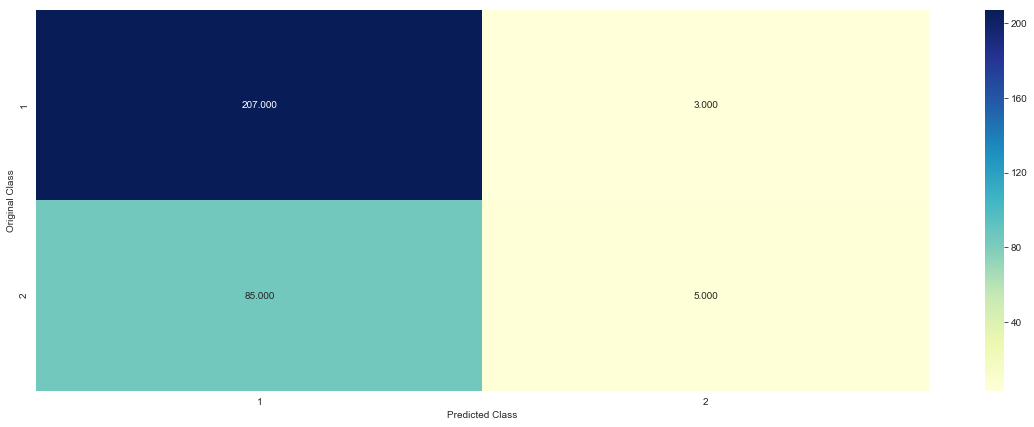

-------------------- Precision matrix (Columm Sum=1) --------------------


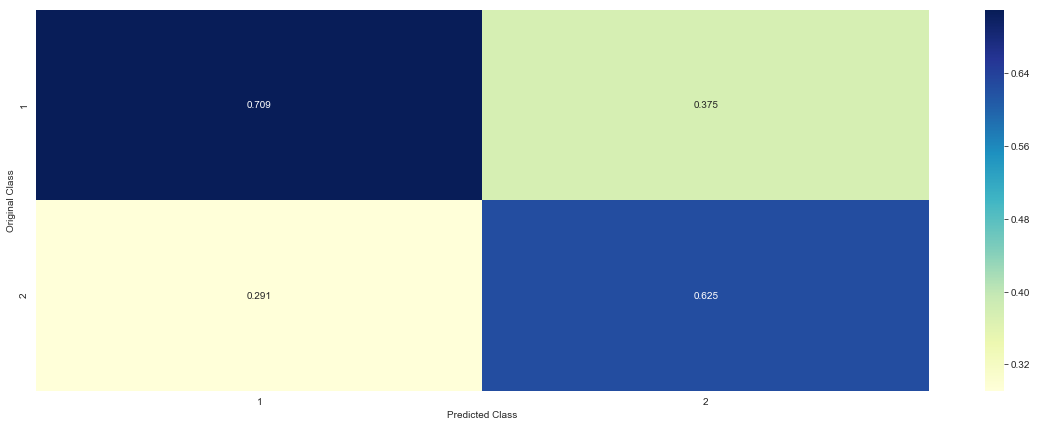

-------------------- Recall matrix (Row sum=1) --------------------


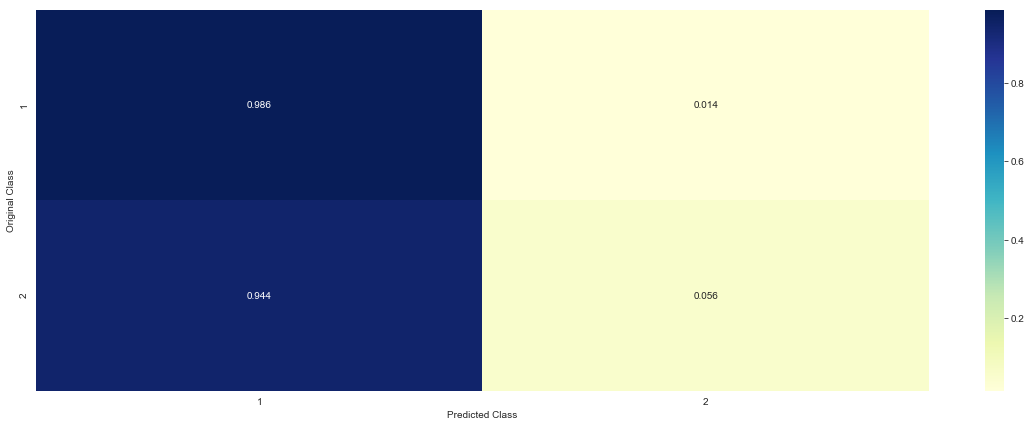

In [242]:
clf = DecisionTreeClassifier(min_samples_split=100,  max_depth=10, random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(x_train_bow, y_train,x_test_bow,y_test, clf)

### Random Forest Classifie

In [243]:
alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
test_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(x_train_bow, y_train)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(x_train_bow, y_train)
        sig_clf_probs = sig_clf.predict_proba(x_test_bow)
        test_log_error_array.append(log_loss(y_test, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(y_test, sig_clf_probs)) 

'''fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, test_log_error_array,c='g')
for i, txt in enumerate(np.round(test_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],test_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(test_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(x_train_bow, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_train_bow, y_train)

for n_estimators = 100 and max depth =  5
Log Loss : 0.5053394731035327
for n_estimators = 100 and max depth =  10
Log Loss : 0.5225746587084489
for n_estimators = 200 and max depth =  5
Log Loss : 0.5057916261813343
for n_estimators = 200 and max depth =  10
Log Loss : 0.5218888884256063
for n_estimators = 500 and max depth =  5
Log Loss : 0.5069651563371788
for n_estimators = 500 and max depth =  10
Log Loss : 0.5226160399496331
for n_estimators = 1000 and max depth =  5
Log Loss : 0.5066051121916706
for n_estimators = 1000 and max depth =  10
Log Loss : 0.520410227238518
for n_estimators = 2000 and max depth =  5
Log Loss : 0.5064595850136128
for n_estimators = 2000 and max depth =  10
Log Loss : 0.5199101653330904


CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True,
                                                             class_weight=None,
                                                             criterion='gini',
                                                             max_depth=5,
                                                             max_features='auto',
                                                             max_leaf_nodes=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_split=None,
                                                             min_samples_leaf=1,
                                                             min_samples_split=2,
                                                             min_weight_fraction_leaf=0.0,
                                                             n_estimators=100,
                   

In [244]:
predict_y = sig_clf.predict_proba(x_train_bow)
train_loss_rf=log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",train_loss_rf)

predict_y = sig_clf.predict_proba(x_test_bow)
test_loss_rf=log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",test_loss_rf)

For values of best estimator =  100 The train log loss is: 0.43340612942420453
For values of best estimator =  100 The test log loss is: 0.5053394731035328


Log loss : 0.5053394731035328
Number of mis-classified points : 0.27
-------------------- Confusion matrix --------------------


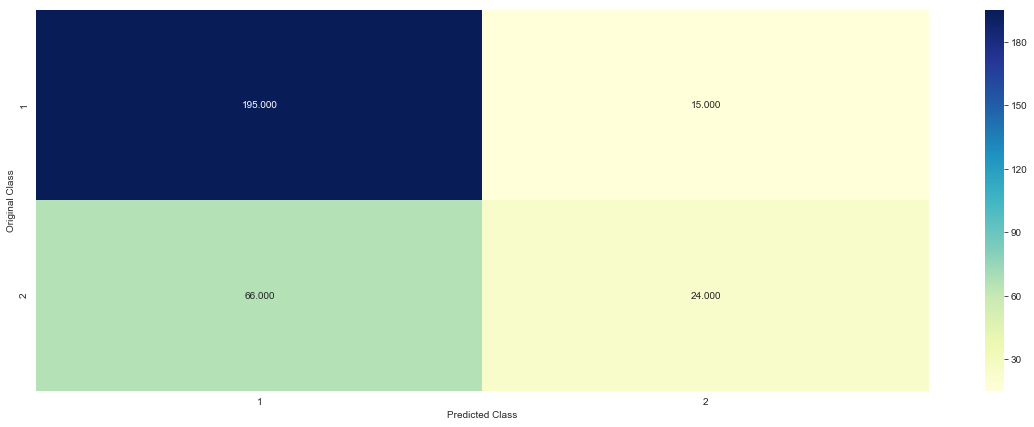

-------------------- Precision matrix (Columm Sum=1) --------------------


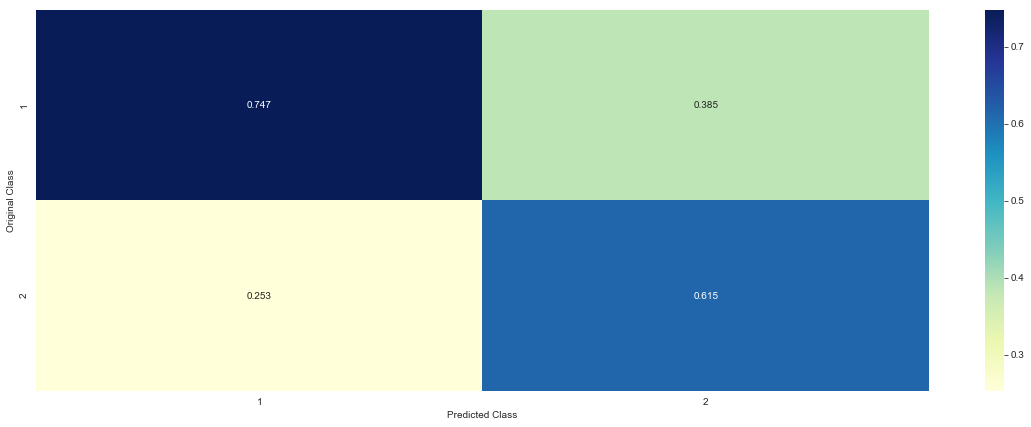

-------------------- Recall matrix (Row sum=1) --------------------


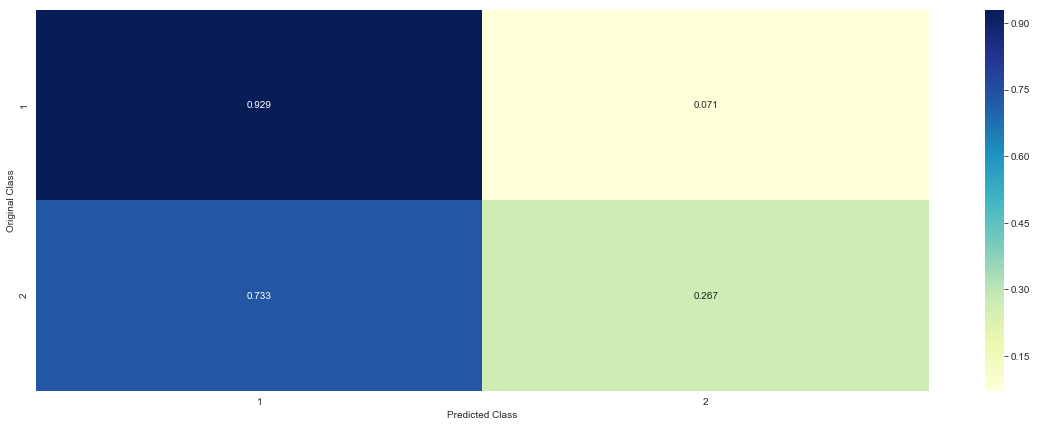

In [245]:
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
predict_and_plot_confusion_matrix(x_train_bow, y_train,x_test_bow,y_test, clf)

In [246]:
importances = clf.feature_importances_
print ("Sorted Feature Importance:")
sorted_feature_importance = sorted(zip(importances, list(x_train)), reverse=True)
print (sorted_feature_importance)

Sorted Feature Importance:
[(0.1350133605619286, 'purpose'), (0.08911305958340908, 'checkin_acc'), (0.07590664995325636, 'personal_status'), (0.04427765166486035, 'svaing_acc'), (0.02878818467895707, 'amount'), (0.026932487290219572, 'other_debtors'), (0.02485389430372967, 'foreign_worker'), (0.02482087472592183, 'inst_plans'), (0.02228052746912944, 'duration'), (0.019190460689027782, 'telephone'), (0.015439090656693334, 'residing_since'), (0.013472367024791775, 'present_emp_since'), (0.012956348020979785, 'credit_history'), (0.012866676508160561, 'inst_rate'), (0.009400381547600296, 'job'), (0.0067129700433749976, 'num_credits'), (0.0063903628382320265, 'age'), (0.003924534979019825, 'property'), (0.0023314926676071077, 'dependents'), (0.0016060218949689549, 'housing')]


### XGBoost Classifier

In [247]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
alpha = [5, 10, 50, 100,300 ,500]
max_depth = [3,5,7,9,11,13]
test_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = XGBClassifier(booster='gbtree',max_depth=j,n_estimators=i,random_state=0)
        clf.fit(x_train_bow, y_train)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(x_train_bow, y_train)
        sig_clf_probs = sig_clf.predict_proba(x_test_bow)
        test_log_error_array.append(log_loss(y_test, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(y_test, sig_clf_probs)) 

'''fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, test_log_error_array,c='g')
for i, txt in enumerate(np.round(test_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],test_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''



for n_estimators = 5 and max depth =  3
Log Loss : 0.5294897846905319
for n_estimators = 5 and max depth =  5
Log Loss : 0.5369510687356306
for n_estimators = 5 and max depth =  7
Log Loss : 0.5379423014352106
for n_estimators = 5 and max depth =  9
Log Loss : 0.5389563477193494
for n_estimators = 5 and max depth =  11
Log Loss : 0.5389184388851799
for n_estimators = 5 and max depth =  13
Log Loss : 0.5400069230289498
for n_estimators = 10 and max depth =  3
Log Loss : 0.5217822109019693
for n_estimators = 10 and max depth =  5
Log Loss : 0.5311792289126975
for n_estimators = 10 and max depth =  7
Log Loss : 0.5377479036484986
for n_estimators = 10 and max depth =  9
Log Loss : 0.5386138875927416
for n_estimators = 10 and max depth =  11
Log Loss : 0.5362514025714347
for n_estimators = 10 and max depth =  13
Log Loss : 0.5378660470589487
for n_estimators = 50 and max depth =  3
Log Loss : 0.5208890031658918
for n_estimators = 50 and max depth =  5
Log Loss : 0.52598866363071
for n_esti

'fig, ax = plt.subplots()\nfeatures = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()\nax.plot(features, test_log_error_array,c=\'g\')\nfor i, txt in enumerate(np.round(test_log_error_array,3)):\n    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],test_log_error_array[i]))\nplt.grid()\nplt.title("Cross Validation Error for each alpha")\nplt.xlabel("Alpha i\'s")\nplt.ylabel("Error measure")\nplt.show()\n'

In [248]:
best_alpha = np.argmin(test_log_error_array)
clf = XGBClassifier(booster='gbtree',max_depth=3,n_estimators=100,random_state=0)
clf.fit(x_train_bow, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_train_bow, y_train)

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    colsample_bylevel=1,
                                                    colsample_bynode=1,
                                                    colsample_bytree=1, gamma=0,
                                                    learning_rate=0.1,
                                                    max_delta_step=0,
                                                    max_depth=3,
                                                    min_child_weight=1,
                                                    missing=None,
                                                    n_estimators=100, n_jobs=1,
                                                    nthread=None,
                                                    objective='binary:logistic',
                                                    random_state=

In [250]:
predict_y = sig_clf.predict_proba(x_train_bow)
train_loss_xgboost=log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best estimator = ', 100, "The train log loss is:",train_loss_xgboost)

predict_y = sig_clf.predict_proba(x_test_bow)
test_loss_xgboost=log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best estimator = ', 100, "The test log loss is:",test_loss_xgboost)

For values of best estimator =  100 The train log loss is: 0.4335462546216723
For values of best estimator =  100 The test log loss is: 0.5184465283002115


Log loss : 0.5184465283002115
Number of mis-classified points : 0.26666666666666666
-------------------- Confusion matrix --------------------


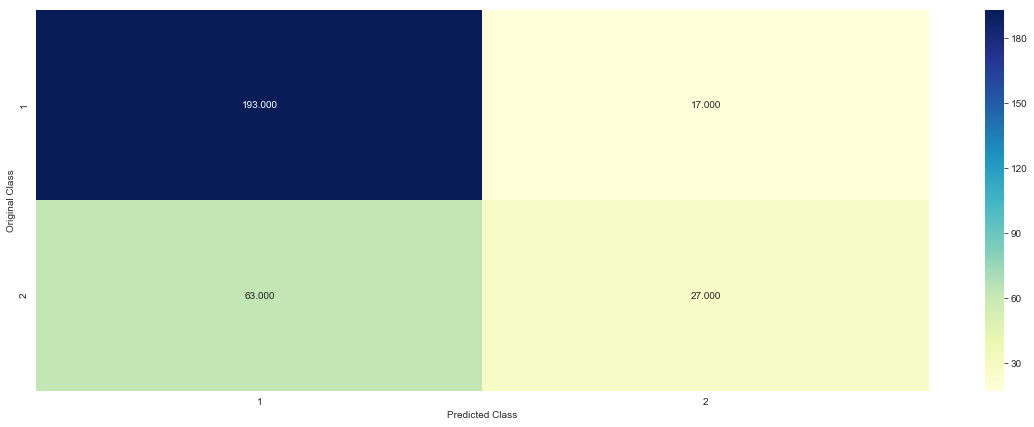

-------------------- Precision matrix (Columm Sum=1) --------------------


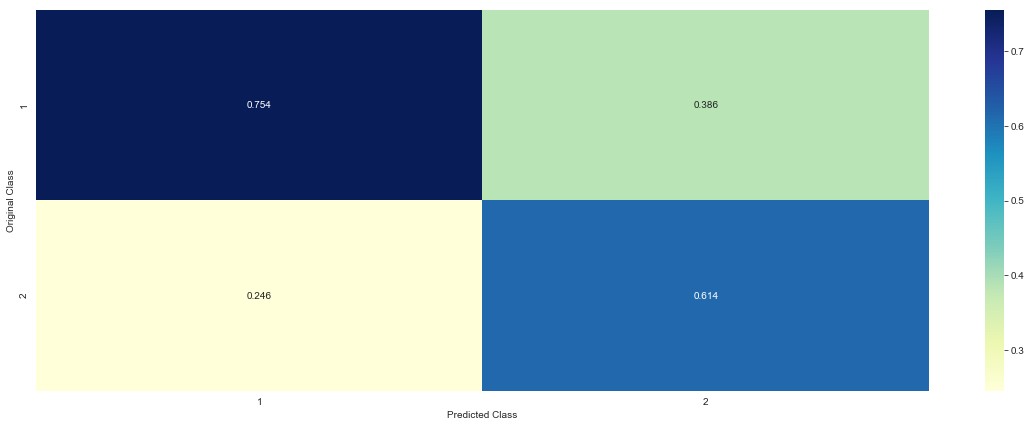

-------------------- Recall matrix (Row sum=1) --------------------


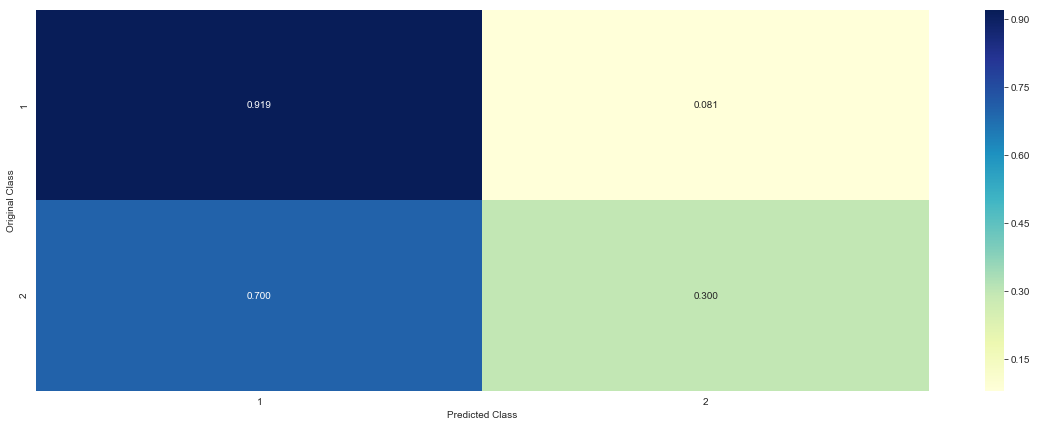

In [251]:
clf = XGBClassifier(booster='gbtree',max_depth=3,n_estimators=100,random_state=0)
predict_and_plot_confusion_matrix(x_train_bow, y_train,x_test_bow,y_test, clf)

In [252]:
sorted_idx = np.argsort(clf.feature_importances_)[::-1]
for index in sorted_idx:
    print([x_train.columns[index], clf.feature_importances_[index]]) 

plot_importance(clf, max_num_features = 15)
pyplot.show()    

['purpose', 0.10966816]
['personal_status', 0.050747592]
['checkin_acc', 0.036185224]
['telephone', 0.035321366]
['inst_plans', 0.03156939]
['svaing_acc', 0.030898433]


IndexError: index 36 is out of bounds for axis 0 with size 20

### Stack the models

In [253]:
clf2 = KNeighborsClassifier(n_neighbors=131)
clf2.fit(x_train_bow, y_train)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")
sig_clf2.fit(x_train_bow, y_train)

clf3 = MultinomialNB(alpha=1e-05)
clf3.fit(x_train_bow, y_train)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")
sig_clf3.fit(x_train_bow, y_train)

clf4 = SGDClassifier(class_weight='balanced', alpha=0.1, penalty='l2', loss='log', random_state=0)
clf4.fit(x_train_bow, y_train)
sig_clf4 = CalibratedClassifierCV(clf4, method="sigmoid")
sig_clf4.fit(x_train_bow, y_train)

clf5 = SGDClassifier(class_weight='balanced', alpha=0.1, penalty='l2', loss='hinge', random_state=0)
clf5.fit(x_train_bow, y_train)
sig_clf5 = CalibratedClassifierCV(clf5, method="sigmoid")
sig_clf5.fit(x_train_bow, y_train)


clf6 = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=5, random_state=0, n_jobs=-1)
clf6.fit(x_train_bow, y_train)
sig_clf6 = CalibratedClassifierCV(clf6, method="sigmoid")
sig_clf6.fit(x_train_bow, y_train)

clf7 = DecisionTreeClassifier(min_samples_split=100,  max_depth=10, random_state=42,class_weight='balanced')
clf7.fit(x_train_bow, y_train)
sig_clf7 = CalibratedClassifierCV(clf7, method="sigmoid")
sig_clf7.fit(x_train_bow, y_train)

clf8 = XGBClassifier(booster='gbtree',max_depth=3,n_estimators=100,random_state=0)
clf8.fit(x_train_bow, y_train)
sig_clf8 = CalibratedClassifierCV(clf8, method="sigmoid")
sig_clf8.fit(x_train_bow, y_train)

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    colsample_bylevel=1,
                                                    colsample_bynode=1,
                                                    colsample_bytree=1, gamma=0,
                                                    learning_rate=0.1,
                                                    max_delta_step=0,
                                                    max_depth=3,
                                                    min_child_weight=1,
                                                    missing=None,
                                                    n_estimators=100, n_jobs=1,
                                                    nthread=None,
                                                    objective='binary:logistic',
                                                    random_state=

In [254]:
#sig_clf2.fit(x_train_bow, y_train)
print("KNN :  Log Loss: %0.2f" % (log_loss(y_test, sig_clf2.predict_proba(x_test_bow))))
#sig_clf3.fit(train_x_onehotCoding, train_y)
print("Naive Bayes : Log Loss: %0.2f" % (log_loss(y_test, sig_clf3.predict_proba(x_test_bow))))

#sig_clf1.fit(x_train_bow, y_train)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(y_test, sig_clf4.predict_proba(x_test_bow))))
#sig_clf2.fit(train_x_onehotCoding, train_y)
print("Support vector machines : Log Loss: %0.2f" % (log_loss(y_test, sig_clf5.predict_proba(x_test_bow))))

#sig_clf2.fit(train_x_onehotCoding, train_y)
print("RF : Log Loss: %0.2f" % (log_loss(y_test, sig_clf6.predict_proba(x_test_bow))))

#sig_clf2.fit(train_x_onehotCoding, train_y)
print("DT : Log Loss: %0.2f" % (log_loss(y_test, sig_clf7.predict_proba(x_test_bow))))

#sig_clf2.fit(train_x_onehotCoding, train_y)
print("XGBoost : Log Loss: %0.2f" % (log_loss(y_test, sig_clf8.predict_proba(x_test_bow))))

print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf2, sig_clf3, sig_clf4,sig_clf5,sig_clf6,sig_clf7,sig_clf8], meta_classifier=lr, use_probas=True)
    sclf.fit(x_train_bow, y_train)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(y_test, sclf.predict_proba(x_test_bow))))
    log_error =log_loss(y_test, sclf.predict_proba(x_test_bow))
    if best_alpha > log_error:
        best_alpha = log_error

KNN :  Log Loss: 0.51
Naive Bayes : Log Loss: 0.52
Logistic Regression :  Log Loss: 0.51
Support vector machines : Log Loss: 0.50
RF : Log Loss: 0.51
DT : Log Loss: 0.53
XGBoost : Log Loss: 0.52
--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 0.677
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 0.613
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 0.543
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 0.510
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 0.549
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 0.670


Log loss (train) on the stacking classifier : 0.4299032355007222
Log loss (test) on the stacking classifier : 0.5100681263012128
Number of missclassified point : 0.27666666666666667
-------------------- Confusion matrix --------------------


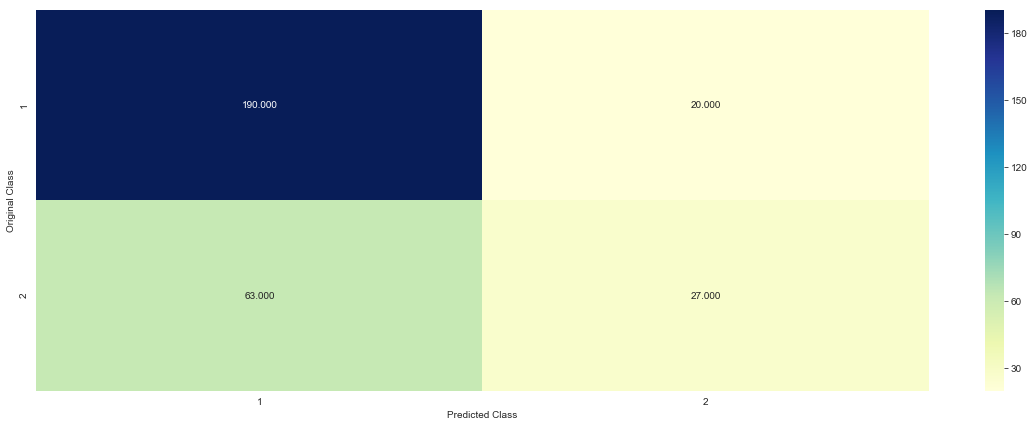

-------------------- Precision matrix (Columm Sum=1) --------------------


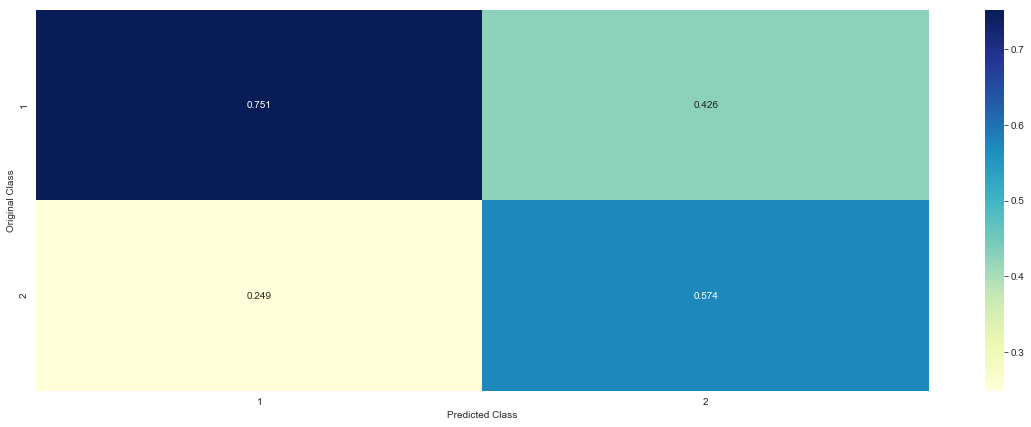

-------------------- Recall matrix (Row sum=1) --------------------


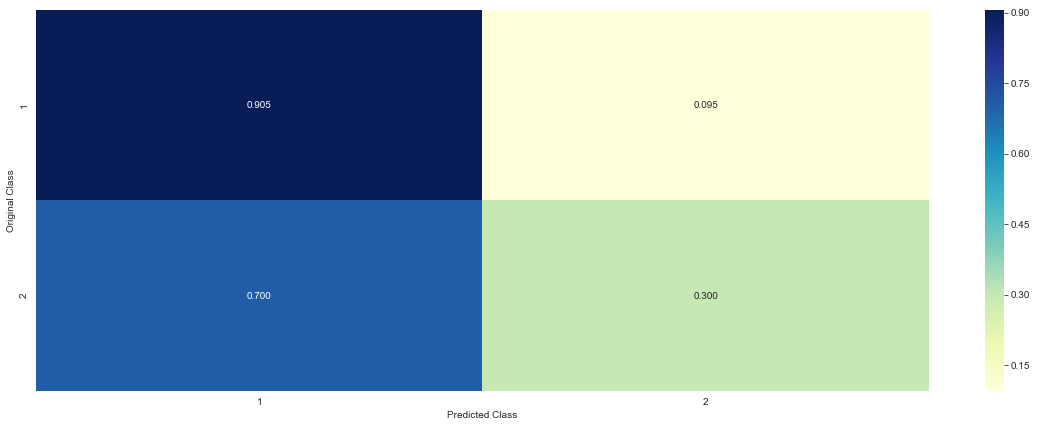

In [259]:
lr = LogisticRegression(C=0.1)
sclf = StackingClassifier(classifiers=[sig_clf2, sig_clf3, sig_clf4,sig_clf5,sig_clf6,sig_clf7,sig_clf8], meta_classifier=lr, use_probas=True)
sclf.fit(x_train_bow, y_train)

train_log_error_stack = log_loss(y_train, sclf.predict_proba(x_train_bow))
print("Log loss (train) on the stacking classifier :",train_log_error_stack)


test_log_error_stack = log_loss(y_test, sclf.predict_proba(x_test_bow))
print("Log loss (test) on the stacking classifier :",test_log_error_stack)

print("Number of missclassified point :", np.count_nonzero((sclf.predict(x_test_bow)- y_test))/y_test.shape[0])
plot_confusion_matrix(test_y=y_test, predict_y=sclf.predict(x_test_bow))

The diagonal shows the correct classified points

## Result

In [260]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = [ "Model","Train_loss", "Test_loss"]
x.add_row(["KNN",train_loss_knn,test_loss_knn])
x.add_row([ "Naive base",train_loss_nb,test_loss_nb])
x.add_row([ "logistic", train_loss_logistic,test_loss_logistic])
x.add_row([ "SVM", train_loss_svm,test_loss_svm])
x.add_row([ "Random Forest", train_loss_rf,test_loss_rf])
x.add_row([ "Decision tree", train_loss_dt,test_loss_dt])
x.add_row(["XGBoost", train_loss_xgboost,test_loss_xgboost])
x.add_row(["Stacking", train_log_error_stack,test_log_error_stack])
print(x)

+---------------+---------------------+--------------------+
|     Model     |      Train_loss     |     Test_loss      |
+---------------+---------------------+--------------------+
|      KNN      |  0.5254030678246904 | 0.5103164863698773 |
|   Naive base  | 0.49438402384962726 | 0.5244343687940877 |
|    logistic   | 0.49388984368629035 | 0.507216640738673  |
|      SVM      | 0.49291072491084476 | 0.5021887125930012 |
| Random Forest | 0.43340612942420453 | 0.5053394731035328 |
| Decision tree |  0.518337015440191  | 0.5279461165533625 |
|    XGBoost    |  0.4335462546216723 | 0.5184465283002115 |
|    Stacking   |  0.4299032355007222 | 0.5100681263012128 |
+---------------+---------------------+--------------------+


Observation:
    
    The best model for loan prediction is Support vector machine which have minimum test error and train error is very near to test error.